In [1]:
import json
from urllib.request import urlopen
import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_jsonparsed_data(projectId):
    response = requests.get("https://tasks.hotosm.org/api/v1/project/" + str(projectId))
    return response.json()

def read_jsonfile_data(fileName):
    with open(fileName) as f:
        data = json.load(f)
    return data    
    
projects = []
project_json = read_jsonfile_data("project.json")

In [3]:
result = pd.DataFrame(columns=['ProjectId', 'TaskId', 'TaskStatus', 'Coordinates'])

In [7]:
validated_percent = {}

In [18]:
for key,value in enumerate(project_json['mapResults']['features']):
    projects.append(value['properties']['projectId'])
    
for projectId in projects:
    val = 0
    task_json = get_jsonparsed_data(projectId)
    for task in task_json['tasks']['features']:
        #result = result.append({'ProjectId' : projectId,
        #               'TaskId' : task['properties']['taskId'],
        #               'TaskStatus' : task['properties']['taskStatus'],
        #               'Coordinates' : task['geometry']['coordinates']}, ignore_index = True)
        if task['properties']['taskStatus'] == "VALIDATED":
            val += 1
    validated_percent[projectId] = val / len(task_json['tasks']['features'])
  

In [51]:
np.set_printoptions(precision=0,suppress=True) 
final =  [int(k) for k, v in validated_percent.items() if v > 0.90]

In [52]:
final_1 = [int(k) for k, v in validated_percent.items() if v == 1]

In [53]:
# a = np.asarray(final_1)
# np.savetxt("project_100b.csv", a, delimiter=",")

In [54]:
# a = np.asarray(final)
# np.savetxt("project_90b.csv", a, delimiter=",")

In [3]:
final_1 = pd.read_csv("project_100.csv", header=None, dtype=int)

In [127]:
np.asarray([3.44444444], dtype=str)

array(['3.44444444'],
      dtype='<U10')

In [58]:
def coords_of_projects(projects):
    coords = []
    for i, projectId in enumerate(projects):
        if i in [i for i in range(0, len(projects), 50)]:
            print("Parsed: %0.1f / 100" % (i / len(projects) * 100))
        task_json = get_jsonparsed_data(projectId)
        coords.append(task_json['areaOfInterest']['coordinates'][0][0])
        
    return coords

In [59]:
coords_list = coords_of_projects(final_1[0])

Parsed: 0.0 / 100
Parsed: 25.8 / 100
Parsed: 51.5 / 100
Parsed: 77.3 / 100


In [64]:
def column(matrix, i):
    return [row[i] for row in matrix]

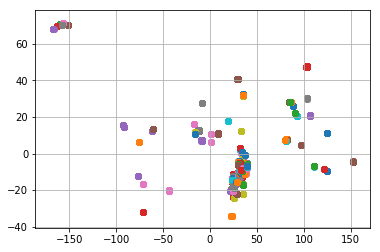

In [98]:
for coords in coords_list:
    plt.scatter(column(coords, 0), column(coords, 1))
plt.grid()

bounding_box: list of floats
The bounding box to create images from. This should be given in the form: [xmin, ymin, xmax, ymax] as longitude and latitude values between [-180, 180] and [-90, 90], respectively. Values should use the WGS84 datum, with longitude and latitude units in decimal degrees.

In [128]:
coords_list[:5]

[[[39.2724573720001, -6.83651598399996],
  [39.2737343410001, -6.83552504499993],
  [39.2747198100001, -6.83597078199995],
  [39.2751009470001, -6.83654042499995],
  [39.2742031280001, -6.83761392899993],
  [39.2724573720001, -6.83651598399996]],
 [[39.241957889, -6.76205604199993],
  [39.2440655390001, -6.75935242499997],
  [39.2463116530001, -6.76074564699995],
  [39.2442590090001, -6.76369809899995],
  [39.241957889, -6.76205604199993]],
 [[39.3243176610001, -6.97773787599992],
  [39.3310672550001, -6.98151874699992],
  [39.3318073780001, -6.98652596399997],
  [39.33178013, -6.98662930199993],
  [39.32949763, -6.99206091999997],
  [39.329445563, -6.99211274499993],
  [39.325664139, -6.99332113399994],
  [39.325299666, -6.99331471999994],
  [39.3252215410001, -6.99331386899998],
  [39.3220052940001, -6.99192092499993],
  [39.3182408260001, -6.98795618099997],
  [39.318858613, -6.98209453799996],
  [39.3243176610001, -6.97773787599992]],
 [[39.259408638122, -6.83384893862956],
  [39.2

In [69]:
def bounding_boxes_from_coords(coords_list):
    bounding_boxes = []
    for coords in coords_list:
        x_min, x_max = min(column(coords, 0)), max(column(coords, 0))
        y_min, y_max = min(column(coords, 1)), max(column(coords, 1))
        # not [xmin, ymin, xmax, ymax]
        bounding_boxes.append([y_min, x_min, y_max, x_max])
    return bounding_boxes

In [99]:
bounding_boxes_list = bounding_boxes_from_coords(coords_list)

In [94]:
from geopy.geocoders import Nominatim


def countries_from_bounding_boxes(bounding_boxes_list):
    geolocator = Nominatim()
    countries_list = []
    for bb in bounding_boxes_list:
        location1 = geolocator.reverse(bb[0:2], language='en')
#         location2 = geolocator.reverse(bb[2:4], language='en')
        countries_list.append(location1.address.split(',')[-1].lower()[1:])
    return countries_list


In [104]:
countries_list = countries_from_bounding_boxes(bounding_boxes_list)

In [105]:
project_ids = final_1[0]
project_ids.shape

(194,)

In [106]:
len(coords_list)

194

In [107]:
len(bounding_boxes_list)

194

In [108]:
len(countries_list)

194

In [109]:
project_ids[:5]

0    5405
1    5397
2    5370
3    5027
4    5021
Name: 0, dtype: int64

In [112]:
column(bounding_boxes_list[:6], 1)

[39.2724573720001,
 39.241957889,
 39.3182408260001,
 39.2519244510693,
 39.2757847397703,
 39.268301582502]

In [126]:
bounding_boxes_list[:6]

[[-6.83761392899993, 39.2724573720001, -6.83552504499993, 39.2751009470001],
 [-6.76369809899995, 39.241957889, -6.75935242499997, 39.2463116530001],
 [-6.99332113399994, 39.3182408260001, -6.97773787599992, 39.3318073780001],
 [-6.83626131078664, 39.2519244510693, -6.81838391641476, 39.2728344339768],
 [-6.81604659146493, 39.2757847397703, -6.7974116649781, 39.286801602869],
 [-6.82012075959811, 39.268301582502, -6.81193575917789, 39.2804069521134]]

In [115]:
data = pd.DataFrame({'id' : project_ids,
              'country' : countries_list,
              'coord_1': column(bounding_boxes_list, 0),
              'coord_2': column(bounding_boxes_list, 1),
              'coord_3': column(bounding_boxes_list, 2),
              'coord_4': column(bounding_boxes_list, 3)})

In [122]:
data.to_csv('data_100validated.csv', float_format='%.15f')

In [124]:
d = pd.read_csv('data_100validated.csv')

In [133]:
coords_list[i]

[[-11.7545557022095, 12.8405694241452],
 [-11.7577314376831, 12.8385609940007],
 [-11.7602205276489, 12.8375986155369],
 [-11.7657351493835, 12.8367826830842],
 [-11.7656922340393, 12.8343767130019],
 [-11.7624950408936, 12.8350252811164],
 [-11.7596411705017, 12.8344813208755],
 [-11.7579245567322, 12.8325146855728],
 [-11.7559933662415, 12.8309873943576],
 [-11.7529034614563, 12.830610800578],
 [-11.7514443397522, 12.8318870327711],
 [-11.748354434967, 12.8387074425744],
 [-11.7495346069336, 12.8399627125639],
 [-11.7545557022095, 12.8405694241452]]

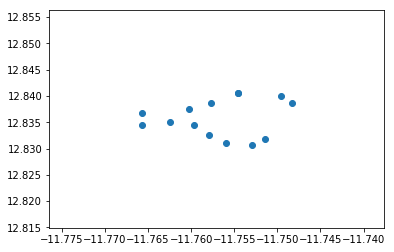

In [134]:
plt.scatter(column(coords_list[i], 0), column(coords_list[i], 1))

In [139]:
bounding_boxes_list[i]

[12.830610800578, -11.7657351493835, 12.8405694241452, -11.748354434967]

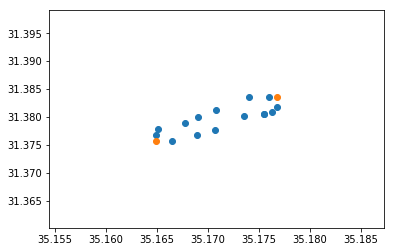

In [141]:
i = 45
coords = coords_list[i]
bounding_boxes = bounding_boxes_list[i]

plt.scatter(column(coords_list[i], 0), column(coords_list[i], 1))
plt.scatter([bounding_boxes[1], bounding_boxes[3]], 
            [bounding_boxes[0], bounding_boxes[2]])

In [155]:
data

,id,country,coord_1,coord_2,coord_3,coord_4
0,5405,tanzania,-6.837614,39.272457,-6.835525,39.275101
1,5397,tanzania,-6.763698,39.241958,-6.759352,39.246312
2,5370,tanzania,-6.993321,39.318241,-6.977738,39.331807
3,5027,tanzania,-6.836261,39.251924,-6.818384,39.272834
4,5021,tanzania,-6.816047,39.275785,-6.797412,39.286802
5,5011,tanzania,-6.820121,39.268302,-6.811936,39.280407
6,5006,senegal,15.970710,-16.513630,16.021120,-16.508017
7,4979,algeria,27.717790,-8.061839,27.757547,-7.994367
8,4909,upper nile,12.359731,32.799296,12.379325,32.807212
9,4857,uganda,1.937611,32.161730,1.944859,32.174647


In [159]:
def show_country_and_coords(i):
    d = data.iloc[i]
    print(d['country'], d['coord_1'], d['coord_2'], d['coord_3'], d['coord_4'], sep=', ')

In [161]:
show_country_and_coords(29)

chad, 17.810148617, 18.9500427246, 17.8127635505, 18.9541625977
